# Basic Image Process

## PIL

- PIL is possible to basic image and change size , cut the image , roatation, change color. It has a varity of the basic image process

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


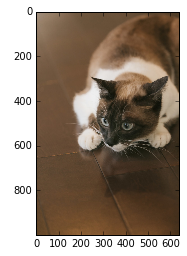

In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

pil_im = Image.open("data/Cat9V9A8958_TP_V1.jpg")
imshow(np.asarray(pil_im))

Change Color

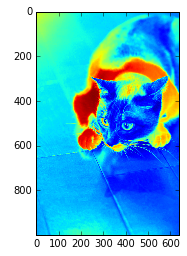

In [2]:
pil_im = Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L")
imshow(np.asarray(pil_im))

numpy's limit is the 32 demision

In [3]:
import os

data_path = "./data/"
filelist = ["cat9V9A9033_TP_V1.jpg", "Cat9V9A8958_TP_V1.jpg"]

for infile in filelist:
    outfile = data_path + os.path.splitext(infile)[0] + ".png"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

cannot convert cat9V9A9033_TP_V1.jpg
cannot convert Cat9V9A8958_TP_V1.jpg


Get Image file list

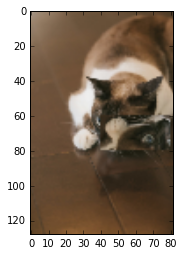

In [4]:
def get_imlist(path):
    return [os.path.join(path, f) for f in os.listdir(path) if f.endwith('.jpg')]

pil_im = Image.open("data/Cat9V9A8958_TP_V1.jpg")
pil_im_t = pil_im.thumbnail((128, 128))
box = (40, 60, 80, 80)
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)
imshow(np.asarray(pil_im))

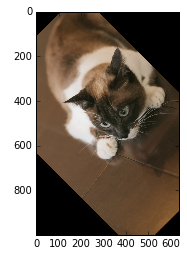

In [5]:
pil_im = Image.open("data/Cat9V9A8958_TP_V1.jpg")
out = pil_im.resize((128, 128))
out = pil_im.rotate(45)
imshow(np.asarray(out))

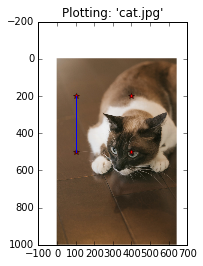

In [6]:
from PIL import Image
from pylab import *

im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg"))
imshow(im)

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plot(x, y, "r*")

plot(x[:2], y[:2])

title("Plotting: 'cat.jpg'")
show()

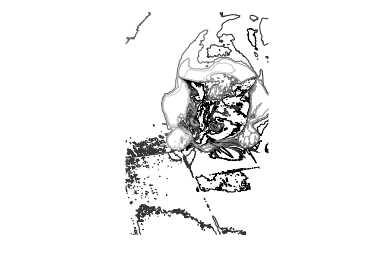

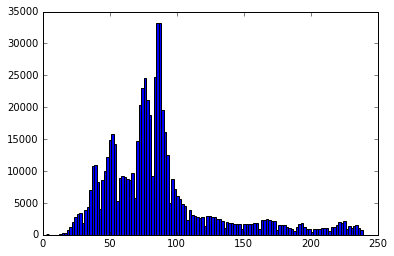

In [7]:
im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L"))
figure()
gray()
contour(im, origin="image")
axis("equal")
axis("off")

figure()
hist(im.flatten(), 128)
show()

In [8]:
print(im.shape, im.dtype)
im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg"))
print(im.shape, im.dtype)

(999, 640) uint8
(999, 640, 3) uint8


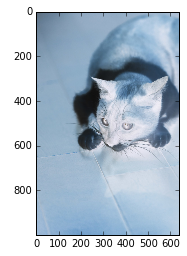

In [9]:
im2 = 255 - im
imshow(im2)

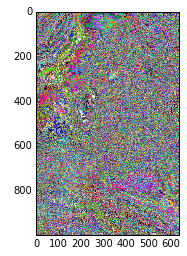

In [10]:
im3 = (100.0 /255 ) * im + 100
imshow(im3)

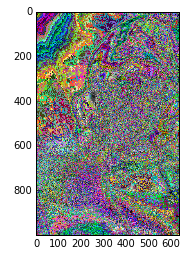

In [11]:
im4 = 255.0 * (im/255.0) ** 2
imshow(im4)

In [14]:
pil_im = Image.fromarray(im)
pil_im = Image.fromarray(uint8(im))

# Histogram Flattening

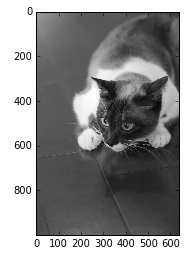

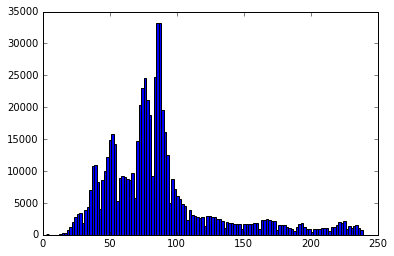

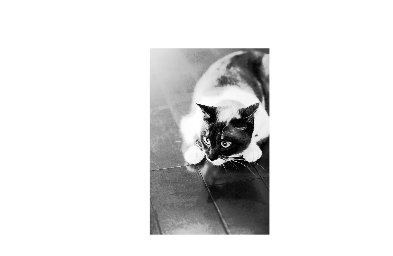

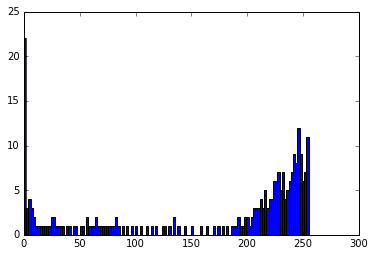

In [51]:
def histeq(im, nbr_bins=256):
    """
    Flattern the gray scale image
    get the Image histogram
    :param im(array): image data
    :param nbr_bins: set the bins
    :return : histogram and gray scale image
    """
    import numpy
    imhist, bins = numpy.histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    
    im2 = interp(im.flatten(), bins[:-1], cdf)
    
    return im2.reshape(im.shape), cdf

im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L"))
im2,cdf = histeq(im)

imshow(im)

figure()
hist(im.flatten(), 128)
show()

figure()
imshow(im2)
axis("equal")
axis("off")

figure()
hist(cdf, 128)
show()

data/cat9V9A8973_TP_V1.jpg..skiped
data/cat9V9A9033_TP_V1.jpg..skiped


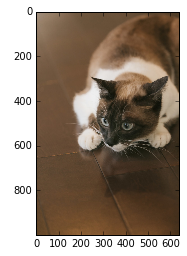

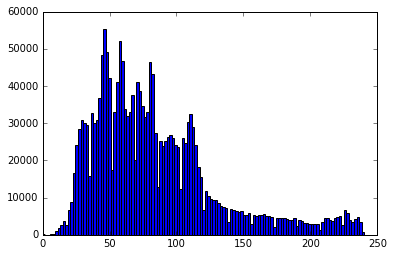

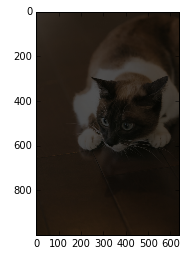

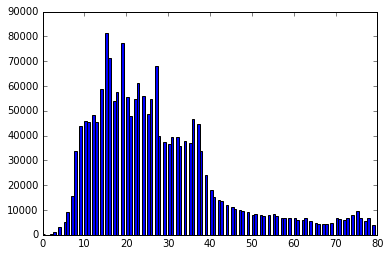

In [64]:
def compute_average(imlist):
    """
    get the average the image
    :param(list): get the image list
    :return(array): average image data
    """
    averageim = array(Image.open(imlist[0]), "f")
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + "..skiped")
    averageim /= len(imlist)
    
    return array(averageim, "uint8")

data_name_list=["data/Cat9V9A8958_TP_V1.jpg", "data/cat9V9A8973_TP_V1.jpg", "data/cat9V9A9033_TP_V1.jpg"]
im3 = compute_average(data_name_list)
im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg"))

imshow(im)

figure()
hist(im.flatten(), 128)
show()

imshow(im3)

figure()
hist(im3.flatten(), 128)
show()

# Principal Component Analysis

25
25


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


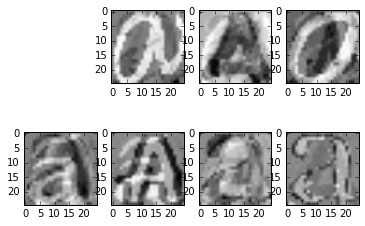

In [123]:
def pca(X):
    """
    Principal Component Analysis
    param X: input the tarin data convert to the array as matrix
    param output: transformation matrix variance average
    """
    num_data, dim = X.shape
    
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    
    if dim > num_data:
        M = dot(X, X.T)
        e, EV = linalg.eigh(M)
        tmp = dot(X.T, EV).T
        V = tmp[::-1]
        S = sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        U,S,V = linalg.svd(X)
        V = V[:num_data]
    
    return V,S,mean_X

from pylab import *

im_list = ["thumb_name/1_t.jpg", "thumb_name/2_t.jpg", "thumb_name/3_t.jpg", "thumb_name/4_t.jpg", "thumb_name/5_t.jpg",
          "thumb_name/6_t.jpg", "thumb_name/7_t.jpg", "thumb_name/8_t.jpg", "thumb_name/9_t.jpg" , "thumb_name/10_t.jpg"]
im = array(Image.open(im_list[0]))
m,n = im.shape[0:2]
print(m)
print(n)
imnbr = len(im_list)

immatrix = array([array(Image.open(im)).flatten() for im in im_list], "f")

V,S,imean = pca(immatrix)

#subplot(2,4,1)
#imshow(immatrix.reshape(m, n))
for i in range(7):
    subplot(2, 4, i + 2)
    imshow(V[i].reshape(m,n))

In [127]:
import pickle

with open("font_pca_modes.pkl", "wb") as f:
    pickle.dump(imean, f)
    pickle.dump(V, f)

with open("font_pca_modes.pkl", "rb") as f:
    imean = pickle.load(f)
    V = pickle.load(f)


In [128]:
savetxt("test.txt", x, "%i")


# Gradation

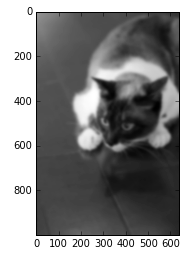

In [132]:
from scipy.ndimage import filters

im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L"))
im2 = filters.gaussian_filter(im, 5)
imshow(im2)

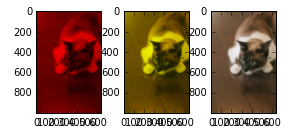

In [142]:
im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg"))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i], 5)
    im2 = uint8(im2)
    subplot(2, 4, i + 2)
    imshow(im2)

# Differentiate

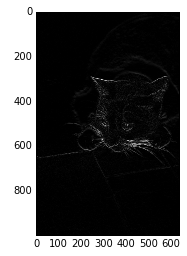

In [144]:
im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L"))
imx = zeros(im.shape)
filters.sobel(im, 0, imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx ** 2 + imy ** 2)

imshow(magnitude)

# Gaussian Differentiate filter

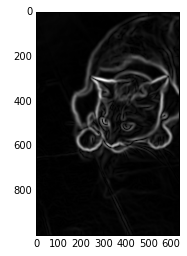

In [149]:
sigma = 5
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (0,1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)

magnitude = sqrt(imx ** 2 + imy ** 2)
imshow(magnitude)

# Morphology

Number of objects: 45
Number of objects: 48


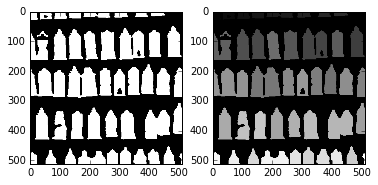

In [163]:
from scipy.ndimage import measurements, morphology

im = array(Image.open("morphology/houses.png").convert("L"))
im = 1*(im<128)

subplot(1, 2, 1)
imshow(im)

labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

subplot(1, 2, 2)
imshow(labels)

im_open = morphology.binary_opening(im, ones((9,5)), iterations=2)
labels_open, nbr_objects = measurements.label(im_open)
print("Number of objects:", nbr_objects)

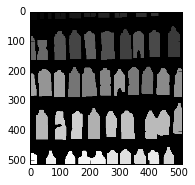

In [164]:
subplot(1, 2, 1)
imshow(labels_open)

# Read Array as the Image

In [167]:
import scipy
from scipy.misc import imsave 
imsave("test.jpg", im)


# Delete the Image Noise

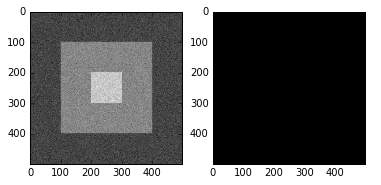

In [178]:
from numpy import random
from scipy.misc import imsave

def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    """
    Rudin-Other-Fatemi
    
    input: Gray Scale Image with Noise, Gaussian distribuation, Tolerance, Tau, tv_weight
    output: Denoise Image
    """
    m,n = im.shape
    
    U = U_init
    Px = im
    Py = im
    error = 1
    
    while(error < tolerance):
        Uold = U
        GradUx = roll(U, -1, axis=1) - U
        GradUy = roll(U, -1, axis=0) - U
        
        PxNew = Px + (tau/tv_weight) * GradUx
        PyNew = Py + (tau/tv_weight) * GradUy
        NormNew = maximum(1, sqrt(PxNew**2 + PyNew**2))
        
        Px = PxNew / NormNew
        Py = PyNew / NormNew
        
        RxPx = roll(Px, 1, axis=1)
        RyPy = roll(Py, 1, axis=0)
        
        DivP = (Px-RxPx) + (Py-RyPy)
        
        U = im + tv_weight*DivP
        
        error = linalg.norm(U-Uold)/sqrt(n*m)
    
    return U, im-U

im = zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300] = 255
im = im + 30 * random.standard_normal((500, 500))

U,T = denoise(im, im)
G = filters.gaussian_filter(im, 10)

subplot(1, 2, 1)
imshow(U)
subplot(1, 2, 2)
imshow(T)

imsave("synth_rof.pdf", U)
imsave("synth_rof_gaussian.pdf", G)

im = array(Image.open("data/Cat9V9A8958_TP_V1.jpg").convert("L"))
U,T = denoise(im, im)



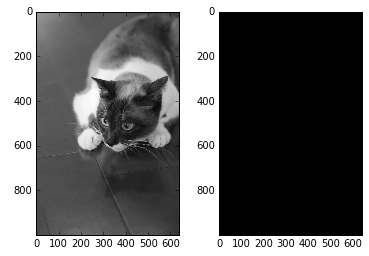

In [177]:
subplot(1, 2, 1)
imshow(U)
subplot(1, 2, 2)
imshow(T)